In [1]:
import torch
import numpy as np
from sklearn.decomposition import PCA 

In [2]:
from MyModel_EEC import RoBERTa, RoBERTa_vis, TextCNN, TextCNN_vis
from MyData_NER import MyDataset_TextCNN
torch.hub._validate_not_a_forked_repo=lambda a,b,c: True

2023-05-06 14:21:40.391458: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-06 14:21:40.527376: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-05-06 14:21:41.044713: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-05-06 14:21:41.044767: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [3]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='1'

model = TextCNN_vis()

In [4]:

model.load_state_dict(torch.load('../saves_textcnn_in/TextCNN_EL_oc_model_pt_epoch_17.pt', map_location='cpu'))

<All keys matched successfully>

In [28]:
# roberta = torch.hub.load('pytorch/fairseq', 'roberta.base')
# embedding = model.embedding
# roberta = model.roberta

In [5]:
text_male = 'he son his him father man boy himself male brother sons fathers men boys males brothers uncle uncles nephew nephews'
text_female = 'she daughter hers her mother woman girl herself female sister daughters mothers women girls females sisters aunt aunts niece nieces'

In [6]:
text_male = 'he son his him father man boy himself male brother'
text_female = 'she daughter hers her mother woman girl herself female sister'

In [7]:
text_male = text_male.split(' ')
text_female = text_female.split(' ')

new_ls=[ ]
for i in range(len(text_male)):
    new_ls.append(text_male[i] + ' ' + text_female[i])

# print(new_ls)
new_ls = ' '.join(new_ls)
print(new_ls)
# tokens = roberta.encode(text)
# print(roberta.decode(tokens))


he she son daughter his hers him her father mother man woman boy girl himself herself male female brother sister


In [10]:
from _main_NER_EEC import *
w2v_path = '/home/weicheng/NLU/Corsair/w2v/glove.840B.300d.txt'
w2v_pickle = w2v_path + '.pickle'
if os.path.exists(w2v_pickle)==False:
    wv, word2id = KeyedVectors.load_word2vec_format(w2v_path, binary=False), {}
    for i, word in enumerate(wv.index2word): word2id[word] = i
    embedding = nn.Embedding.from_pretrained(torch.FloatTensor(wv.vectors))
    pb.Pickle_Save([embedding, word2id], w2v_pickle)
else:
    [embedding, word2id] = pb.Pickle_Read(w2v_pickle)
embedding.weight.requires_grad = False

Pickle Read


In [15]:
# myAllDataset = MyDataset_TextCNN()
# test_dataset  = MyDataset_TextCNN(embedding, word2id, examples=['male', 'female'])
male_text = []
print(len(text_male))
for word in text_male:
    if word in word2id:
        vector = embedding.weight[word2id[word]]
        male_text.append(vector)
    elif word.lower() in word2id:
        vector = embedding.weight[word2id[word.lower()]]
        male_text.append(vector)

print(len(male_text))

10
10


In [21]:
print(male_text[0].shape)

torch.Size([300])


In [16]:
female_text = []
print(len(text_female))
for word in text_female:
    if word in word2id:
        vector = embedding.weight[word2id[word]]
        female_text.append(vector)
    elif word.lower() in word2id:
        vector = embedding.weight[word2id[word.lower()]]
        female_text.append(vector)

print(len(female_text))

10
10


In [28]:
last_layer_features=[ ]
for i in range(len(text_male)):
    last_layer_features.append(male_text[i])
    last_layer_features.append(female_text[i])

In [29]:
# last_layer_features = np.array(last_layer_features)
print([last_layer_features[i].shape for i in range(len(last_layer_features))])

[torch.Size([300]), torch.Size([300]), torch.Size([300]), torch.Size([300]), torch.Size([300]), torch.Size([300]), torch.Size([300]), torch.Size([300]), torch.Size([300]), torch.Size([300]), torch.Size([300]), torch.Size([300]), torch.Size([300]), torch.Size([300]), torch.Size([300]), torch.Size([300]), torch.Size([300]), torch.Size([300]), torch.Size([300]), torch.Size([300])]


In [30]:
last_layer_features = torch.stack(last_layer_features, dim=0)

In [17]:
female_text[0].shape

torch.Size([300])

In [31]:
# tokens = roberta.encode(new_ls)
# print(roberta.decode(tokens))
# last_layer_features = roberta.extract_features(tokens)
print(last_layer_features.shape)

torch.Size([20, 300])


In [30]:
last_layer_features[0:1, 1:-1].shape

torch.Size([1, 20, 768])

In [32]:
def doPCA(pairs, num_components=10):
    matrix = []
    for i in range(0, len(pairs)-1, 2):
        a = pairs[i]
        b = pairs[i+1]
    # for a, b in pairs:
        center = (a+b)/2
        matrix.append(a-center)
        matrix.append(b-center)
    matrix = np.array(matrix)
    pca = PCA(n_components=num_components)
    pca.fit(matrix)
    return pca

In [34]:
pca = doPCA(last_layer_features.numpy(), 2)

In [35]:
pca.components_.shape

(2, 300)

In [36]:
import matplotlib.pyplot as plt

In [ ]:
## TODO: 
# def ss_calculation(text_words):
    

In [40]:
text_words = 'joy sad pride'

emotion_word_dict= {'joy': ['ecstatic', 'excited', 'glad', 'happy', 'relieved'],
                    'sadness': ['depressed', 'devastated', 'disappointed', 'miserable', 'sad'],
                    'fear': ['anxious', 'discouraged', 'fearful', 'scared', 'terrified'],
                    'anger': ['angry', 'annoyed', 'enraged', 'furious', 'irritated']}

emotional_situation_word_dict= {'joy': ['amazing', 'funny', 'great', 'hilarious', 'wonderful'],
                                'sadness': ['depressing', 'gloomy', 'grim', 'heartbreaking', 'serious'],
                                'fear': ['dreadful', 'horrible', 'shocking', 'terrifying', 'threatening'],
                                'anger': ['annoying', 'displeasing', 'irritating', 'outrageous', 'vexing']}

text_words = ['angry', 'furious', 'irritated', 'enraged', 'annoyed', 'sad',
       'depressed', 'devastated', 'miserable', 'disappointed',
       'terrified', 'discouraged', 'scared', 'anxious', 'fearful',
       'happy', 'ecstatic', 'glad', 'relieved', 'excited', 
       'irritating', 'outrageous', 'annoying',
       'depressing', 'serious', 'grim', 'heartbreaking', 'gloomy',
       'horrible', 'threatening', 'terrifying', 'shocking', 'dreadful',
       'funny', 'hilarious', 'amazing', 'wonderful', 'great']

# 'vexing', 'displeasing'

# print(len(text_words))
# text_words = ' '.join(text_words)
# for i in range(len(text_words)):
# word = text_words[i]
# tokens = roberta.encode(text_words)
# print(len(tokens))
# # print(roberta.decode(tokens))
# print([roberta.decode(t.unsqueeze(0)) for t in tokens])
# # print(roberta.decode(tokens))
# last_layer_features = roberta.extract_features(tokens)

last_layer_features = []
print(len(text_words))
for word in text_words:
    if word in word2id:
        vector = embedding.weight[word2id[word]]
        last_layer_features.append(vector)
    elif word.lower() in word2id:
        vector = embedding.weight[word2id[word.lower()]]
        last_layer_features.append(vector)
    else:
        print(word)

print(len(last_layer_features))

38
38


In [49]:
tens = torch.tensor([0, 5800, 0])
print([roberta.decode(t.unsqueeze(0)) for t in tens])

['', ' angry', '']


In [41]:
last_layer_features.shape

AttributeError: 'list' object has no attribute 'shape'

In [42]:
new_word = torch.stack(last_layer_features, dim=0).numpy()

In [43]:
x_axis, y_axis = pca.components_

In [44]:
print(x_axis.shape)
print(new_word.shape)

(300,)
(38, 300)


In [46]:
new_word = torch.tensor(new_word)

In [47]:
proj_x = torch.matmul(new_word, torch.tensor(x_axis).unsqueeze(1))/torch.norm(torch.tensor(x_axis))

In [48]:
proj_x.shape
proj_x = proj_x.squeeze().detach().numpy()

In [49]:
proj_y = torch.matmul(new_word, torch.tensor(y_axis).unsqueeze(1))/torch.norm(torch.tensor(y_axis))

In [50]:
proj_y.shape
proj_y = proj_y.squeeze().detach().numpy()

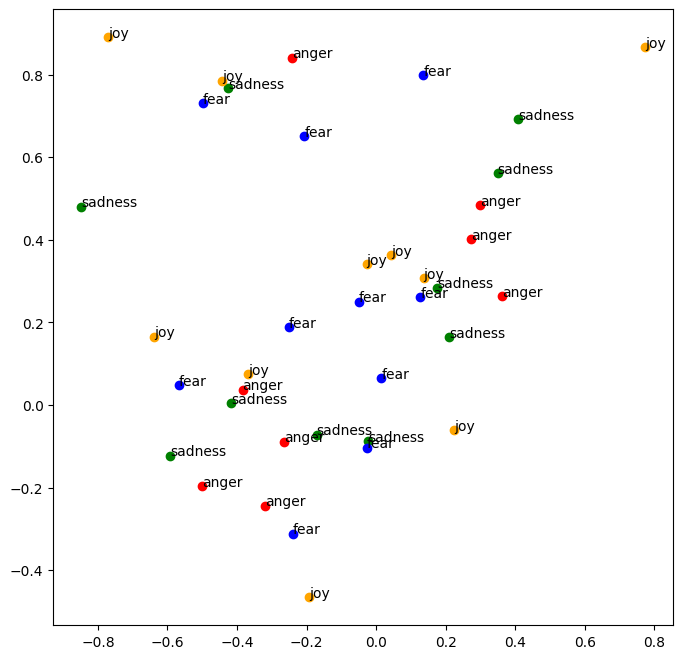

In [52]:
# plt.scatter(proj_x.squeeze().detach().numpy(), proj_y.squeeze().detach().numpy(), 
#             )
reversed = {'ecstatic': 'joy',
 'excited': 'joy',
 'glad': 'joy',
 'happy': 'joy',
 'relieved': 'joy',
 'depressed': 'sadness',
 'devastated': 'sadness',
 'disappointed': 'sadness',
 'miserable': 'sadness',
 'sad': 'sadness',
 'anxious': 'fear',
 'discouraged': 'fear',
 'fearful': 'fear',
 'scared': 'fear',
 'terrified': 'fear',
 'angry': 'anger',
 'annoyed': 'anger',
 'enraged': 'anger',
 'furious': 'anger',
 'irritated': 'anger',
 'amazing': 'joy',
 'funny': 'joy',
 'great': 'joy',
 'hilarious': 'joy',
 'wonderful': 'joy',
 'depressing': 'sadness',
 'gloomy': 'sadness',
 'grim': 'sadness',
 'heartbreaking': 'sadness',
 'serious': 'sadness',
 'dreadful': 'fear',
 'horrible': 'fear',
 'shocking': 'fear',
 'terrifying': 'fear',
 'threatening': 'fear',
 'annoying': 'anger',
 'displeasing': 'anger',
 'irritating': 'anger',
 'outrageous': 'anger',
 'vexing': 'anger'}

text_words = ['angry', 'furious', 'irritated', 'enraged', 'annoyed', 'sad',
       'depressed', 'devastated', 'miserable', 'disappointed',
       'terrified', 'discouraged', 'scared', 'anxious', 'fearful',
       'happy', 'ecstatic', 'glad', 'relieved', 'excited', 
       'irritating', 'outrageous', 'annoying',
       'depressing', 'serious', 'grim', 'heartbreaking', 'gloomy',
       'horrible', 'threatening', 'terrifying', 'shocking', 'dreadful',
       'funny', 'hilarious', 'amazing', 'wonderful', 'great']

color = {'fear':'blue', 'anger':'red', 'sadness':'green', 'joy':'orange'}

fig, ax = plt.subplots(figsize=(8, 8))
for i, txt in enumerate(text_words):
    ax.annotate(reversed[txt], (proj_x[i], proj_y[i]))
    ax.scatter(proj_x[i], proj_y[i], c=[color[reversed[txt]],])

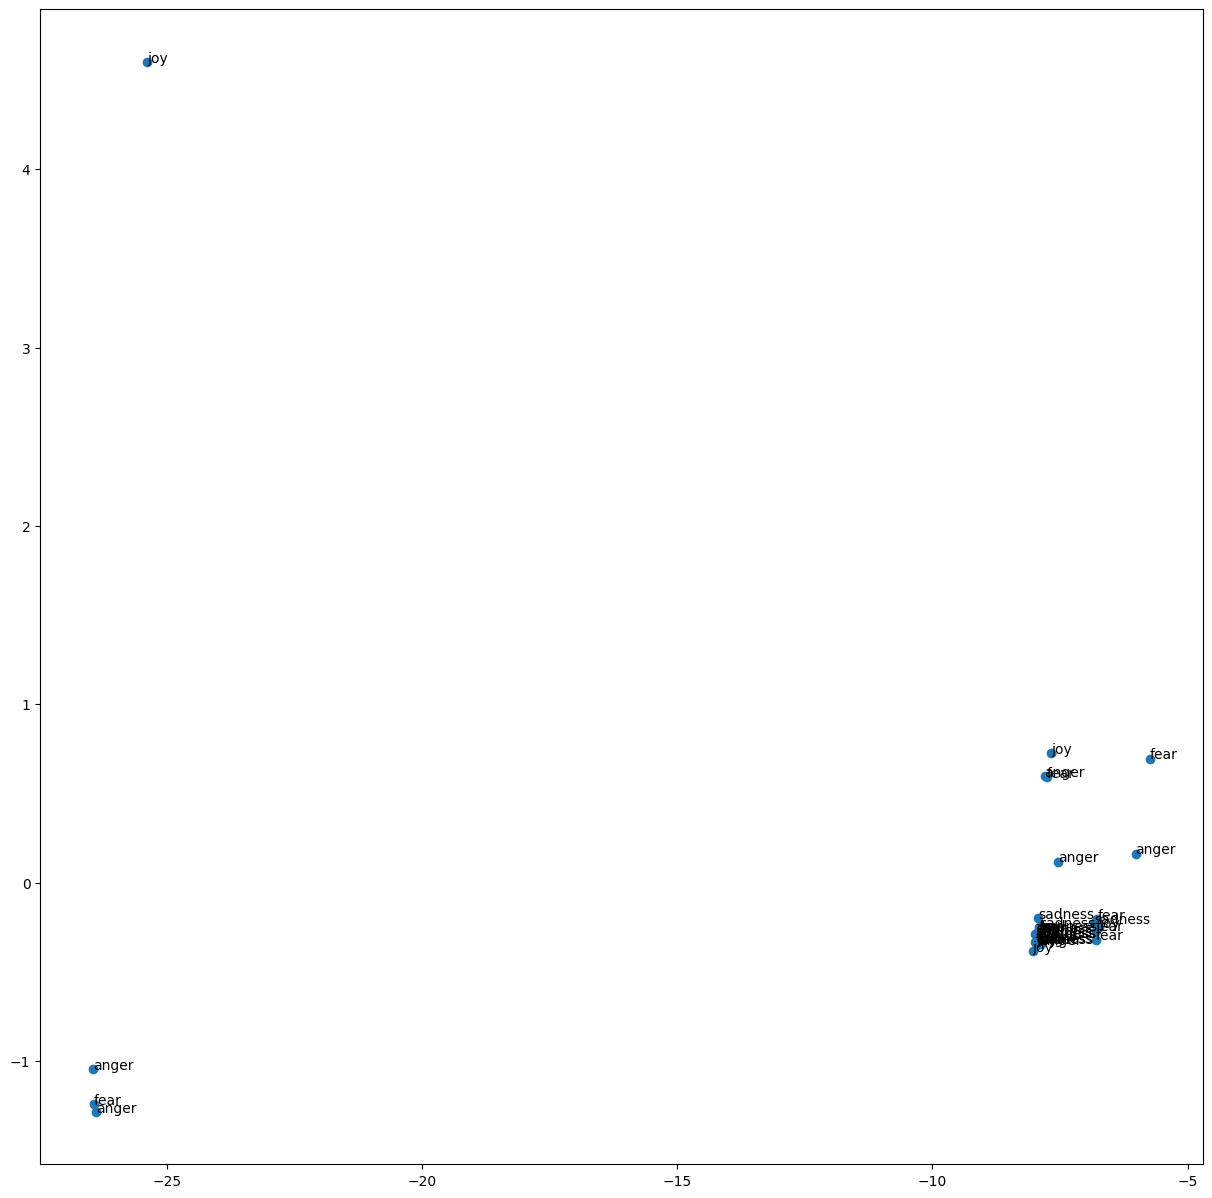

In [58]:
# plt.scatter(proj_x.squeeze().detach().numpy(), proj_y.squeeze().detach().numpy(), 
#             )
reversed = {'ecstatic': 'joy',
 'excited': 'joy',
 'glad': 'joy',
 'happy': 'joy',
 'relieved': 'joy',
 'depressed': 'sadness',
 'devastated': 'sadness',
 'disappointed': 'sadness',
 'miserable': 'sadness',
 'sad': 'sadness',
 'anxious': 'fear',
 'discouraged': 'fear',
 'fearful': 'fear',
 'scared': 'fear',
 'terrified': 'fear',
 'angry': 'anger',
 'annoyed': 'anger',
 'enraged': 'anger',
 'furious': 'anger',
 'irritated': 'anger',
 'amazing': 'joy',
 'funny': 'joy',
 'great': 'joy',
 'hilarious': 'joy',
 'wonderful': 'joy',
 'depressing': 'sadness',
 'gloomy': 'sadness',
 'grim': 'sadness',
 'heartbreaking': 'sadness',
 'serious': 'sadness',
 'dreadful': 'fear',
 'horrible': 'fear',
 'shocking': 'fear',
 'terrifying': 'fear',
 'threatening': 'fear',
 'annoying': 'anger',
 'displeasing': 'anger',
 'irritating': 'anger',
 'outrageous': 'anger',
 'vexing': 'anger'}

text_words = ['angry', 'furious', 'irritated', 'enraged', 'annoyed', 'sad',
       'depressed', 'devastated', 'miserable', 'disappointed',
       'terrified', 'discouraged', 'scared', 'anxious', 'fearful',
       'happy', 'ecstatic', 'glad', 'relieved', 'excited', 
       'irritating', 'outrageous', 'annoying',
       'depressing', 'serious', 'grim', 'heartbreaking', 'gloomy',
       'horrible', 'threatening', 'terrifying', 'shocking', 'dreadful',
       'funny', 'hilarious', 'amazing', 'wonderful', 'great']

fig, ax = plt.subplots(figsize=(15, 15))

# proj_x = (proj_x - proj_x.min()) / (proj_x.max() - proj_x.min())
# proj_y = (proj_y - proj_y.min()) / (proj_y.max() - proj_y.min())

ax.scatter(proj_x, proj_y, 
            )
for i, txt in enumerate(text_words):
    ax.annotate(reversed[txt], (proj_x[i], proj_y[i]))